<a href="https://colab.research.google.com/github/nupur1262/Geeksman_AISquad_Project1_NupurPahuja/blob/master/LOGO_COLAB_3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**LINK OF GOOGLE-DRIVE:**
https://drive.google.com/drive/folders/1l2YpfjizmFyWurttuk-b5H1ZefDZAAws?usp=sharing

##**IMPORTING OUR TRAINED MODEL**
As in the second Notebook , we have created the link for export.pkl file , we are going to use that link to get that file here , so that we have access to the the Model that we have trained previously

In [36]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19nQsDYzMXEdfPaUbcvONsvQIBpoSNALc' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19nQsDYzMXEdfPaUbcvONsvQIBpoSNALc" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-10-21 19:24:25--  https://docs.google.com/uc?export=download&confirm=R5LL&id=19nQsDYzMXEdfPaUbcvONsvQIBpoSNALc
Resolving docs.google.com (docs.google.com)... 209.85.200.138, 209.85.200.101, 209.85.200.100, ...
Connecting to docs.google.com (docs.google.com)|209.85.200.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-0s-docs.googleusercontent.com/docs/securesc/tc73k9j9f0uaei6bcaba8515harhmjam/qjktb5p8mat5jebrek60lisclk21app8/1603308225000/07085962028189936718/01520944157356414267Z/19nQsDYzMXEdfPaUbcvONsvQIBpoSNALc?e=download [following]
--2020-10-21 19:24:25--  https://doc-08-0s-docs.googleusercontent.com/docs/securesc/tc73k9j9f0uaei6bcaba8515harhmjam/qjktb5p8mat5jebrek60lisclk21app8/1603308225000/07085962028189936718/01520944157356414267Z/19nQsDYzMXEdfPaUbcvONsvQIBpoSNALc?e=download
Resolving doc-08-0s-docs.googleusercontent.com (doc-08-0s-docs.googleusercontent.com)... 108.177.112.132, 2607:f8b0:4001:c12::84
Connectin

**Importing Required Libraries**

In [37]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [38]:
predictor = load_learner('/content/')

#**MAKING PREDICTION FUNCTION**
Making prediction function which accepts a test_image address as input and will return the corresponding predicted value for us.

In [39]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

**Uploading kaggle.json file**

In [40]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle (3).json


**Setting environment variables , so that kaggle api can work properly**

In [41]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**Downloading the DataSet from Kaggle**

In [42]:
!kaggle datasets download -d nupurpahuja09/brand-logo-project

brand-logo-project.zip: Skipping, found more recently modified local copy (use --force to force download)


**Unzipping downloaded data**

In [ ]:
!unzip "*.zip"

**Predicting for a single image**

In [43]:
all_test_images=os.listdir("/content/test_data")

micromax


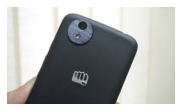

In [44]:
idx=0
print(my_predictor("/content/test_data/"+all_test_images[idx]))
img = open_image("/content/test_data/"+all_test_images[idx])
img.show()

##**Making Video**

In [45]:
import cv2
test_files=os.listdir("/content/test_data")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [46]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

**Uploading the video on Kora-Drive**

In [21]:
!pip install -U kora
from kora.drive import upload_public

     |████████████████████████████████| 51kB 1.8MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 


In [47]:
url = upload_public('my_final_output.mp4')

In [48]:
url

'https://drive.google.com/uc?id=1RPyNJMf6Wf_EObLYmgzmZW0rivSu6LIV'

***Video can be seen here now***

In [49]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")